In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import torch
import pickle
import json
from torchvision.datasets import CIFAR10, CIFAR100, SVHN, ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm
from pathlib import Path
from PIL import Image
from matplotlib import pyplot as plt
from collections import Counter
from helpers import *
from explore import *
from sklearn.metrics import roc_auc_score
from itertools import product
pd.set_option('display.max_rows', 1000)
sns.set_theme(style='whitegrid')

In [2]:
class_names = ["airplane", "automobile","bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Load Pickle Results

In [3]:
sns.set_theme(style="whitegrid", palette="dark")

In [4]:
def save_pickle(root, filename, data):
    filename = os.path.join(root, 
                     f'{filename}.pickle')
    print(filename)
    with open(filename, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        print(f"saved {filename}")

def load_pickle(root, filename):
    filename = os.path.join(root, 
                     f'{filename}.pickle')
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [5]:
cifar10_k_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool"
cifar10_q_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_query_ckpt_199_avg_pool"
imgnet_k_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool"
imgnet_q_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_query_ckpt_199_avg_pool"

In [6]:
clusters = pca = 0
colms = ["metric",  "ood", "pca", "clusters", "e_auroc", \
         "sklearn_auroc", "linear_results", "global_mal_cov"]

## query vs key encoder

### CIFAR10

In [7]:
ood = "CIFAR100"
cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root, "results.pickle")))[colms]
cdfk = cdfk[(cdfk.ood==ood) & (cdfk.global_mal_cov==False)]
cdfk[(cdfk.clusters==clusters) & (cdfk.pca==pca)]

,metric,ood,pca,clusters,e_auroc,sklearn_auroc,linear_results,global_mal_cov
0,cosine,CIFAR100,0,0,64.982332,65.169849,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False
25,mahalanobis,CIFAR100,0,0,62.344450,76.967037,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False


In [8]:
cdfk.linear_results.values[0]

{'data_set': 'CIFAR10',
 'train_accuracy': 87.99585459183673,
 'test_accuracy': 84.169921875}

In [9]:
cdfq = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_q_root, "results.pickle")))[colms]
cdfq = cdfq[(cdfq.global_mal_cov==False)]
cdfq

,metric,ood,pca,clusters,e_auroc,sklearn_auroc,linear_results,global_mal_cov
1,mahalanobis,CIFAR100,0,0,62.307095,76.973657,"{'data_set': 'CIFAR10', 'train_accuracy': 87.8...",False
2,cosine,CIFAR100,0,0,64.812889,64.959266,"{'data_set': 'CIFAR10', 'train_accuracy': 87.8...",False


In [10]:
cdfq.linear_results.values[0]

{'data_set': 'CIFAR10',
 'train_accuracy': 87.84877232142857,
 'test_accuracy': 84.189453125}

### CIFAR100

In [11]:
ood = "CIFAR10"
idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
idfk = idfk[(idfk.ood==ood) & (idfk.global_mal_cov==False)]
idfk[(idfk.clusters==clusters)& (idfk.pca==pca)]

,metric,ood,pca,clusters,e_auroc,sklearn_auroc,linear_results,global_mal_cov
0,cosine,CIFAR10,0,0,51.403964,51.466561,"{'data_set': 'CIFAR100', 'train_accuracy': 70....",False
25,mahalanobis,CIFAR10,0,0,0.002522,53.737863,"{'data_set': 'CIFAR100', 'train_accuracy': 70....",False


In [12]:
idfk.linear_results.values[0]

{'data_set': 'CIFAR100',
 'train_accuracy': 70.7553411989796,
 'test_accuracy': 58.427734375}

In [13]:
idfq = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_q_root, "results.pickle")))[colms]
idfq = idfq[(idfq.global_mal_cov==False)]
idfq

,metric,ood,pca,clusters,e_auroc,sklearn_auroc,linear_results,global_mal_cov
0,cosine,CIFAR10,0,0,51.242941,51.366497,"{'data_set': 'CIFAR100', 'train_accuracy': 70....",False
2,mahalanobis,CIFAR10,0,0,0.002867,50.995395,"{'data_set': 'CIFAR100', 'train_accuracy': 70....",False


In [14]:
idfq.linear_results.values[0]

{'data_set': 'CIFAR100',
 'train_accuracy': 70.87970344387755,
 'test_accuracy': 58.466796875}

## Cosine vs Mahalanobis

In [15]:
ood = "CIFAR100"
cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root, "results.pickle")))[colms]
cdfk = cdfk[(cdfk.pca == pca) & (cdfk.clusters !=clusters) & (cdfk.global_mal_cov==False)]
cdfk = cdfk[(cdfk.ood == ood)]
cdfk.head()

,metric,ood,pca,clusters,e_auroc,sklearn_auroc,linear_results,global_mal_cov
1,cosine,CIFAR100,0,10,62.992813,63.078814,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False
2,cosine,CIFAR100,0,20,66.494544,66.641570,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False
3,cosine,CIFAR100,0,30,69.009767,69.297583,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False
4,cosine,CIFAR100,0,40,69.943167,70.200658,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False
5,cosine,CIFAR100,0,50,70.244643,70.531166,"{'data_set': 'CIFAR10', 'train_accuracy': 87.9...",False


In [16]:
ood = "CIFAR10"
idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
idfk = idfk[(idfk.pca == pca) & (idfk.clusters !=clusters) & (idfk.global_mal_cov==False)]
idfk = idfk[(idfk.ood == ood)]

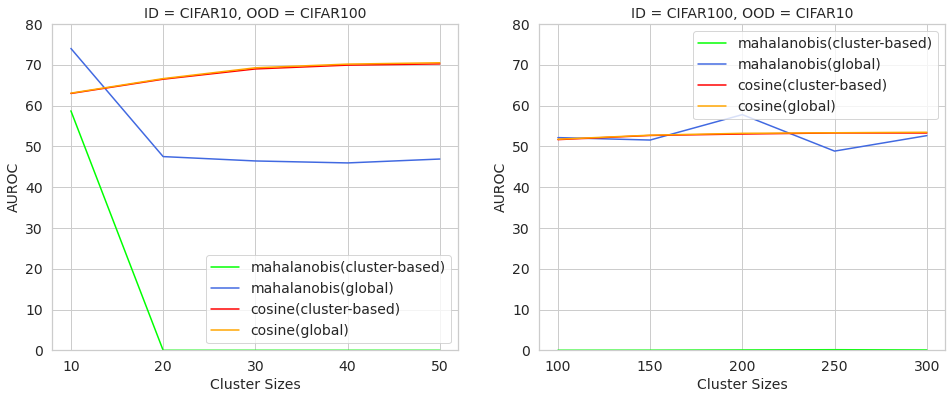

In [17]:
fig = plt.figure(figsize=(16, 6))
fontsize = 14

def set_ytickfntsize(ax, fontsize):
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize) 
        
def set_xtickfntsize(ax, fontsize):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize) 
        
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text("ID = CIFAR10, OOD = CIFAR100")
ax2.title.set_text("ID = CIFAR100, OOD = CIFAR10")
ax1.title.set_fontsize(fontsize)
ax2.title.set_fontsize(fontsize)

x_ticks = cdfk[cdfk.metric=="mahalanobis"].clusters
ax1.plot(cdfk[cdfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
ax1.plot(cdfk[cdfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
ax1.plot(cdfk[cdfk.metric=="cosine"].e_auroc.values, color="red", label="cosine(cluster-based)")
ax1.plot(cdfk[cdfk.metric=="cosine"].sklearn_auroc.values, color="orange", label="cosine(global)")
ax1.set_ylabel("AUROC", size=fontsize)
ax1.set_xlabel("Cluster Sizes", size=fontsize)
ax1.set_xticks(np.arange(len(x_ticks)))
ax1.set_xticklabels(x_ticks, size=fontsize)
set_ytickfntsize(ax1, fontsize)
ax1.legend(loc="lower right", prop={'size': fontsize})
ax1.set_ylim([0, 80])

x_ticks = idfk[idfk.metric=="mahalanobis"].clusters
ax2.plot(idfk[idfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
ax2.plot(idfk[idfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
ax2.plot(idfk[idfk.metric=="cosine"].e_auroc.values, color="red", label="cosine(cluster-based)")
ax2.plot(idfk[idfk.metric=="cosine"].sklearn_auroc.values, color="orange", label="cosine(global)")
ax2.set_ylabel("AUROC", size=fontsize)
ax2.set_xlabel("Cluster Sizes", size=fontsize)
ax2.set_xticks(np.arange(len(x_ticks)))
ax2.set_xticklabels(x_ticks, size=fontsize)
set_ytickfntsize(ax2, fontsize)
ax2.legend(loc="upper right", prop={'size': fontsize})
ax2.set_ylim([0, 80])
plt.savefig("../cache/mal_vs_cos", bbox_inches='tight')

## Mahalanabois fixed cov

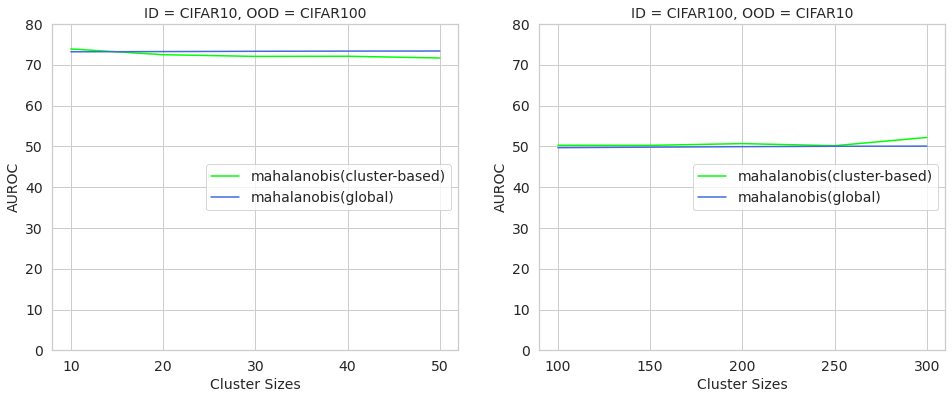

In [18]:
pca = clusters = 0

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root, "results.pickle")))[colms]
cdfk = cdfk[(cdfk.pca == pca) & (cdfk.clusters !=clusters) & (cdfk.global_mal_cov==True)]


idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
idfk = idfk[(idfk.pca == pca) & (idfk.clusters !=clusters) & (idfk.global_mal_cov==True)]

ax1.title.set_text("ID = CIFAR10, OOD = CIFAR100")
ax2.title.set_text("ID = CIFAR100, OOD = CIFAR10")
ax1.title.set_fontsize(fontsize)
ax2.title.set_fontsize(fontsize)

ood = "CIFAR100"
cdfk = cdfk[cdfk.ood==ood]
x_ticks = cdfk[cdfk.metric=="mahalanobis"].clusters
ax1.plot(cdfk[cdfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
ax1.plot(cdfk[cdfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
ax1.set_ylabel("AUROC", size=fontsize)
ax1.set_xlabel("Cluster Sizes", size=fontsize)
ax1.set_xticks(np.arange(len(x_ticks)))
ax1.set_xticklabels(x_ticks, size=fontsize)
ax1.legend(loc="center right", prop={'size': fontsize})
ax1.set_ylim([0, 80])
set_ytickfntsize(ax1, fontsize)

ood = "CIFAR10"
idfk = idfk[idfk.ood==ood]
x_ticks = idfk[idfk.metric=="mahalanobis"].clusters
ax2.plot(idfk[idfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
ax2.plot(idfk[idfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
ax2.set_ylabel("AUROC", size=fontsize)
ax2.set_xlabel("Cluster Sizes", size=fontsize)
ax2.set_xticks(np.arange(len(x_ticks)))
ax2.set_xticklabels(x_ticks, size=fontsize)
ax2.legend(loc="center right", prop={'size': fontsize})
ax2.set_ylim([0, 80])
set_ytickfntsize(ax2, fontsize)

plt.savefig("../cache/mal_vs_cos_covfixed", bbox_inches='tight')

## PCA comparision

In [19]:
def plot_cpca(pca, ax, ood):
    cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root, "results.pickle")))[colms]
    cdfk = cdfk[cdfk.ood==ood]
    cdfk = cdfk[(cdfk.pca == pca) & (cdfk.clusters !=0) & (cdfk.global_mal_cov==False)]
    x_ticks = cdfk[cdfk.metric=="mahalanobis"].clusters
    
    l5 = ax.plot(cdfk[cdfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
    l6 = ax.plot(cdfk[cdfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
    l7 = ax.plot(cdfk[cdfk.metric=="cosine"].e_auroc.values, color="red", label="cosine(cluster-based)")
    l8 = ax.plot(cdfk[cdfk.metric=="cosine"].sklearn_auroc.values, color="orange", label="cosine(global)")
    ax.set_ylabel("AUROC", size=fontsize)
    ax.set_xticks(np.arange(len(x_ticks)))
    ax.set_xlabel("Cluster Sizes", size=fontsize)
    ax.set_xticklabels(x_ticks, size=fontsize)
    return l5, l6, l7, l8


def plot_ipca(pca, ax, ood):
    idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
    idfk = idfk[idfk.ood==ood]
    idfk = idfk[(idfk.pca == pca) & (idfk.clusters !=0) & (idfk.global_mal_cov==False)]
    x_ticks = idfk[idfk.metric=="mahalanobis"].clusters
    
    ax.plot(idfk[idfk.metric=="mahalanobis"].e_auroc.values, color="lime", label="mahalanobis(cluster-based)")
    ax.plot(idfk[idfk.metric=="mahalanobis"].sklearn_auroc.values, color="royalblue", label="mahalanobis(global)")
    ax.plot(idfk[idfk.metric=="cosine"].e_auroc.values, color="red", label="cosine(cluster-based)")
    ax.plot(idfk[idfk.metric=="cosine"].sklearn_auroc.values, color="orange", label="cosine(global)")
    ax.set_ylabel("AUROC", size=fontsize)
    ax.set_xlabel("Cluster Sizes", size=fontsize)
    ax.set_xticks(np.arange(len(x_ticks)))
    ax.set_xticklabels(x_ticks, size=fontsize)
    return 

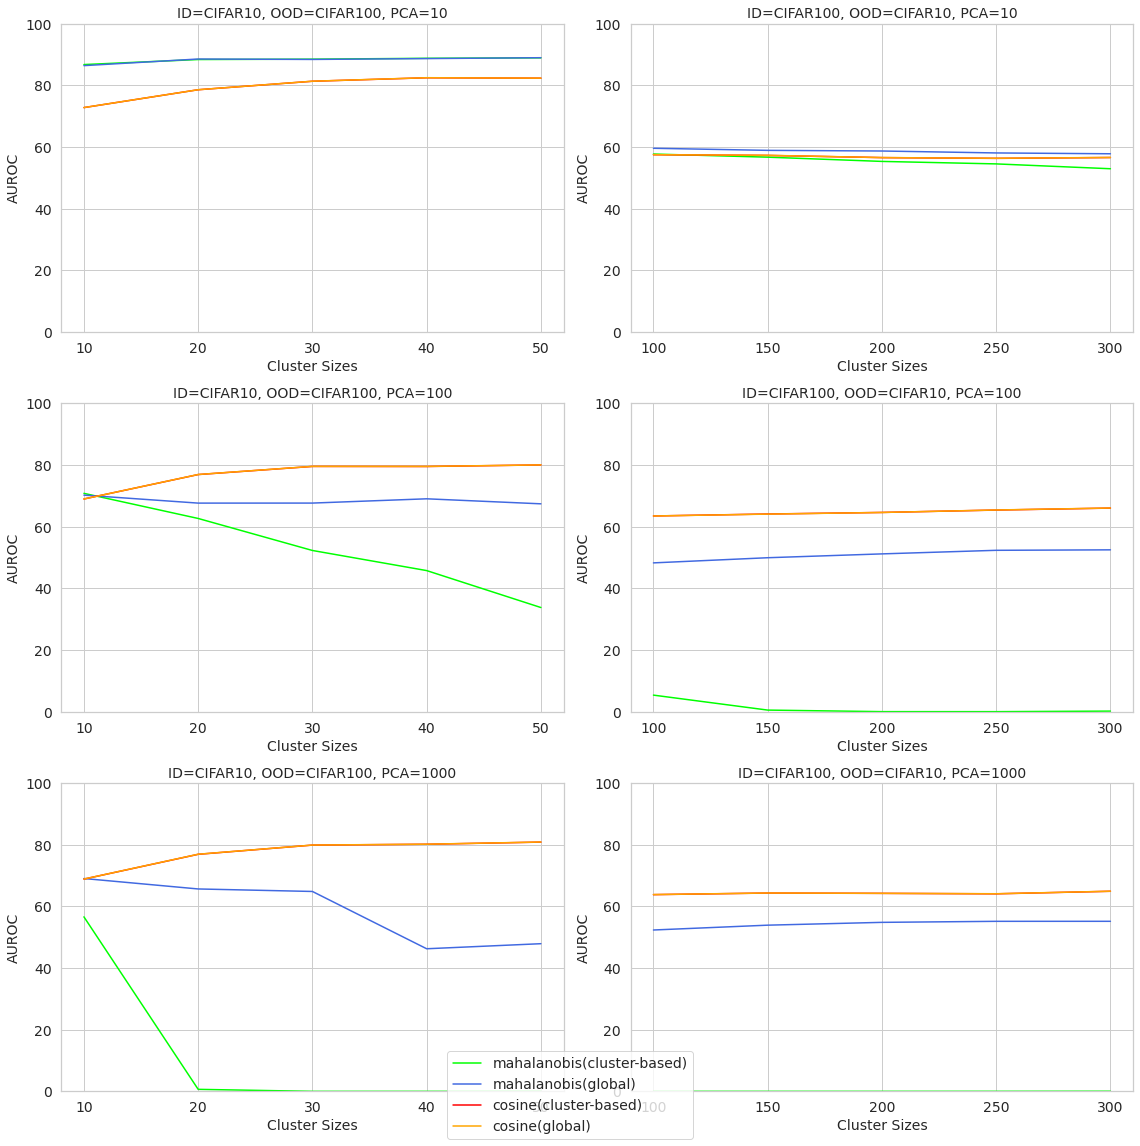

In [20]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.set_ylim([0, 100])
ax2.set_ylim([0, 100])
ax3.set_ylim([0, 100])
ax4.set_ylim([0, 100])
ax5.set_ylim([0, 100])
ax6.set_ylim([0, 100])

ax1.title.set_text("ID=CIFAR10, OOD=CIFAR100, PCA=10")
ax3.title.set_text("ID=CIFAR10, OOD=CIFAR100, PCA=100")
ax5.title.set_text("ID=CIFAR10, OOD=CIFAR100, PCA=1000")

ax2.title.set_text("ID=CIFAR100, OOD=CIFAR10, PCA=10")
ax4.title.set_text("ID=CIFAR100, OOD=CIFAR10, PCA=100")
ax6.title.set_text("ID=CIFAR100, OOD=CIFAR10, PCA=1000")
for _ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    set_ytickfntsize(_ax, fontsize)
    _ax.title.set_fontsize(fontsize)

l5, l6, l7, l8 = plot_cpca(pca=10, ax=ax1, ood="CIFAR100")
plot_cpca(pca=100, ax=ax3, ood="CIFAR100")
plot_cpca(pca=1000, ax=ax5, ood="CIFAR100")

plot_ipca(pca=10, ax=ax2, ood="CIFAR10")
plot_ipca(pca=100, ax=ax4, ood="CIFAR10")
plot_ipca(pca=1000, ax=ax6, ood="CIFAR10")


fig.legend((l5[0], l6[0], l7[0], l8[0]),\
           ('mahalanobis(cluster-based)', 'mahalanobis(global)',\
            'cosine(cluster-based)', 'cosine(global)'), \
           'lower center', prop={'size': fontsize})

fig.tight_layout()
plt.savefig("../cache/com_pca", bbox_inches='tight')

## Distribution plot

In [21]:
def gen_dis_data(_root, metric, ood, pca):
    df = pd.DataFrame(pd.read_pickle(\
            os.path.join(_root, "results.pickle")))[colms]
    df = df[df.ood==ood]
    df = df[(df.pca == pca) & (df.clusters !=0) & (df.global_mal_cov==True)]
    return df
cif_mal_dis = gen_dis_data(cifar10_k_root, "Mahalanobis", ood="CIFAR100", pca=50)
cif_cos_dis = gen_dis_data(cifar10_k_root, "Cosine", ood="CIFAR100", pca=50)
img_mal_dis = gen_dis_data(imgnet_k_root, "Mahalanobis", ood="CIFAR10", pca=100)
img_cos_dis = gen_dis_data(imgnet_k_root, "Cosine", ood="CIFAR10", pca=50)

 ## <font color="red">TO DO: Distribution Plot for Contrastive Embeddings </font>

NameError: name 'cif_fin_1' is not defined

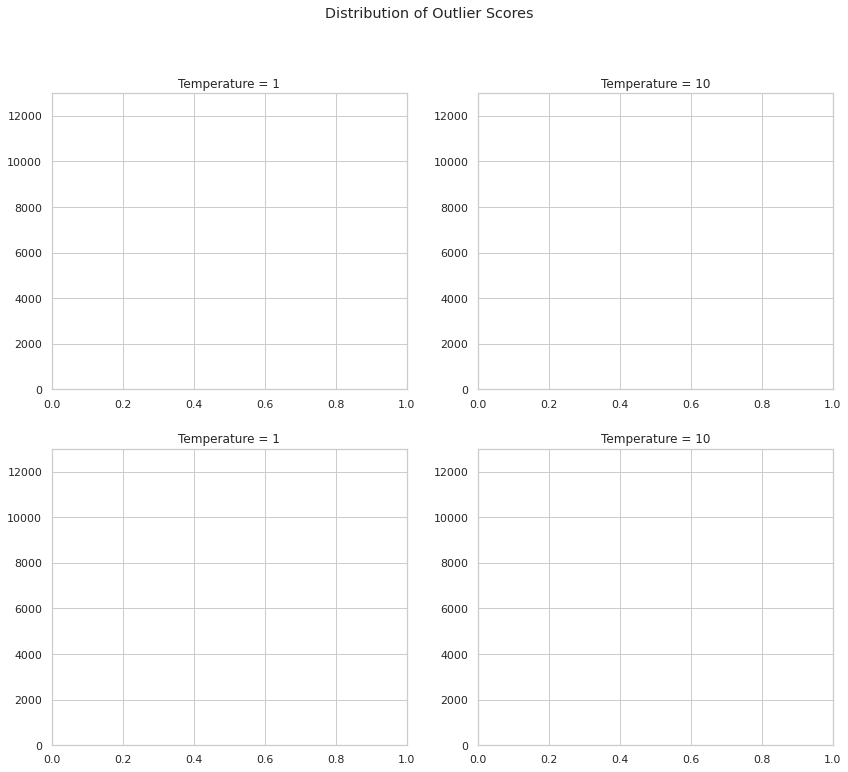

In [22]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_ylim([0, 13000])
ax2.set_ylim([0, 13000])
ax3.set_ylim([0, 13000])
ax4.set_ylim([0, 13000])

fig.suptitle("Distribution of Outlier Scores")
ax1.title.set_text("Temperature = 1")
ax2.title.set_text("Temperature = 10")
ax3.title.set_text("Temperature = 1")
ax4.title.set_text("Temperature = 10")

ax1.hist(pd.read_pickle(cif_fin_1[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax1.hist(pd.read_pickle(cif_fin_1[2]), label="ID", fc=(0, 0, 1, 0.5))
ax1.set_xlabel("Confidence Score")
ax1.set_ylabel("Number of Data Points")
ax1.legend(["OOD=CIFAR100", "ID=CIFAR10"], loc="upper left")

ax2.hist(pd.read_pickle(cif_fin_5[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax2.hist(pd.read_pickle(cif_fin_5[2]), label="ID", fc=(0, 0, 1, 0.5))
ax2.set_xlabel("Confidence Score")
ax2.set_ylabel("Number of Data Points")
ax2.legend(["OOD=CIFAR100", "ID=CIFAR10"], loc="upper right")


ax3.hist(pd.read_pickle(img_fin_1[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax3.hist(pd.read_pickle(img_fin_1[2]), label="ID", fc=(0, 0, 1, 0.5))
ax3.set_xlabel("Confidence Score")
ax3.set_ylabel("Number of Data Points")
ax3.legend(["OOD=CIFAR10", "ID=CIFAR100"], loc="upper right")

ax4.hist(pd.read_pickle(img_fin_5[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax4.hist(pd.read_pickle(img_fin_5[2]), label="ID", fc=(0, 0, 1, 0.5))
ax4.set_xlabel("Confidence Score")
ax4.set_ylabel("Number of Data Points")
ax4.legend(["OOD=CIFAR10", "ID=CIFAR100"], loc="upper right")

#plt.savefig(f"../cache/finetuned_confidence_scores")

## Finetune

In [23]:
def best_aurocs(df, oods):
    all_best_auroc = []
    for i in oods:
        best_auroc = {}
        _df = df[df.ood==i].sort_values(by=['auroc']).iloc[-1]
        best_auroc['ood'] = i
        best_auroc['temperature'] = _df['temperature']
        best_auroc['auroc'] = _df['auroc']
        all_best_auroc.append(best_auroc)
    all_best_auroc = pd.DataFrame(all_best_auroc)
    return all_best_auroc

In [24]:
img_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/finetune/key_ckpt_199_mn_2_lp_10"
cifar_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/finetune/key_ckpt_199_mn_2_lp_10"

In [25]:
def gen_path(root, temp):
    return list(Path(os.path.join(root, f"temp_{temp}")).iterdir())

In [26]:
c_oods = ["CIFAR100", "SVHN", "LSUNResize"]
ptc = [i for i in list(Path(cifar_root).iterdir()) if ".pickle" in str(i)]
dsc = pd.DataFrame(pd.read_pickle(ptc[-1]))
dsc['auroc'] = dsc['auroc'].apply(lambda x:x*100)
dsc.head()

,id,ood,temperature,model_no,ckpt,auroc,tnr@tpr95
0,CIFAR10,CIFAR100,100,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,84.4,0.482
1,CIFAR10,CIFAR100,50,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,84.4,0.479
2,CIFAR10,CIFAR100,10,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,84.5,0.503
3,CIFAR10,CIFAR100,5,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,84.4,0.507
4,CIFAR10,CIFAR100,3,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,83.8,0.509


In [27]:
best_aurocs(dsc, c_oods)

,ood,temperature,auroc
0,CIFAR100,10,84.5
1,SVHN,50,92.4
2,LSUNResize,100,90.9


In [28]:
i_oods = ["CIFAR10", "SVHN", "LSUNResize"]

pti = [i for i in list(Path(img_root).iterdir()) if ".pickle" in str(i)]
dsi = pd.DataFrame(pd.read_pickle(pti[-1]))
dsi['auroc'] = dsi['auroc'].apply(lambda x:x*100)
dsi.head()

,id,ood,temperature,model_no,ckpt,auroc,tnr@tpr95
0,CIFAR100,CIFAR10,100,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,63.8,0.152
1,CIFAR100,CIFAR10,50,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,63.7,0.156
2,CIFAR100,CIFAR10,10,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,63.2,0.150
3,CIFAR100,CIFAR10,5,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,63.6,0.161
4,CIFAR100,CIFAR10,3,key_ckpt_199_mn_2_lp_10,checkpoint_0600.pth.tar,64.9,0.185


In [29]:
best_aurocs(dsi, i_oods)

,ood,temperature,auroc
0,CIFAR10,2,65.7
1,SVHN,100,86.3
2,LSUNResize,5,71.1


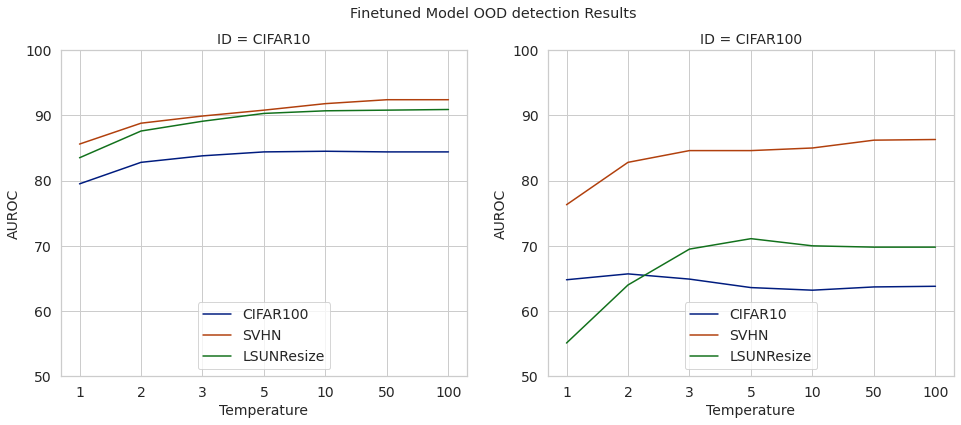

In [30]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_ylim([50, 100])
ax2.set_ylim([50, 100])

fig.suptitle("Finetuned Model OOD detection Results")
ax1.title.set_text("ID = CIFAR10")
ax2.title.set_text("ID = CIFAR100")
ax1.title.set_fontsize(fontsize)
ax2.title.set_fontsize(fontsize)

_temp = np.unique(dsc.temperature.values)
for o in c_oods:
    ax1.plot(dsc[dsc.ood==o].sort_values(by="temperature").auroc.values, label=o)
ax1.set_xticks(np.arange(len(_temp)))
ax1.set_xticklabels(_temp, size=fontsize)
ax1.set_xlabel("Temperature", size=fontsize)
ax1.set_ylabel("AUROC", size=fontsize)
ax1.legend(c_oods, loc="lower center", prop={'size': fontsize})
set_ytickfntsize(ax1, fontsize)

idfk = idfk[idfk.ood==ood]

_temp = np.unique(dsi.temperature.values)
for o in i_oods:
    ax2.plot(dsi[dsi.ood==o].sort_values(by="temperature").auroc.values, label=o)
ax2.set_xticks(np.arange(len(_temp)))
ax2.set_xticklabels(_temp, size=fontsize)
ax2.set_xlabel("Temperature", size=fontsize)
ax2.set_ylabel("AUROC", size=fontsize)
ax2.legend(i_oods, loc="lower center", prop={'size': fontsize})
set_ytickfntsize(ax2, fontsize)
plt.savefig(f"../cache/finetuned", bbox_inches='tight')

## Distilled

In [31]:
img_root_d = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/distilled_kd/key_ckpt_199_mn_2_lp_10"
cifar_root_d = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/distilled_kd/key_ckpt_199_mn_2_lp_10"

In [32]:
ptcd = [i for i in list(Path(cifar_root_d).iterdir()) if ".pickle" in str(i)]
dscd = pd.DataFrame(pd.read_pickle(ptcd[-1]))
dscd['auroc'] = dscd['auroc'].apply(lambda x:x*100)
dscd.head()

,id,ood,temperature,model_no,ckpt,auroc,tnr@tpr95
0,CIFAR10,CIFAR100,100,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,84.9,0.528
1,CIFAR10,CIFAR100,50,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,84.9,0.530
2,CIFAR10,CIFAR100,10,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,85.0,0.523
3,CIFAR10,CIFAR100,5,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,84.9,0.540
4,CIFAR10,CIFAR100,3,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,84.4,0.545


In [33]:
best_aurocs(dscd, c_oods)

,ood,temperature,auroc
0,CIFAR100,10,85.0
1,SVHN,50,91.3
2,LSUNResize,10,88.0


In [34]:
ptid = [i for i in list(Path(img_root_d).iterdir()) if ".pickle" in str(i)]
dsid = pd.DataFrame(pd.read_pickle(ptid[-1]))
dsid['auroc'] = dsid['auroc'].apply(lambda x:x*100)
dsid.head()

,id,ood,temperature,model_no,ckpt,auroc,tnr@tpr95
0,CIFAR100,CIFAR10,100,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,64.5,0.175
1,CIFAR100,CIFAR10,50,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,64.5,0.168
2,CIFAR100,CIFAR10,10,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,64.3,0.163
3,CIFAR100,CIFAR10,5,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,64.4,0.176
4,CIFAR100,CIFAR10,3,key_ckpt_199_mn_2_lp_10,resnet18_best.pth,64.8,0.192


In [35]:
best_aurocs(dsid, i_oods)

,ood,temperature,auroc
0,CIFAR10,2,65.5
1,SVHN,3,81.8
2,LSUNResize,3,72.0


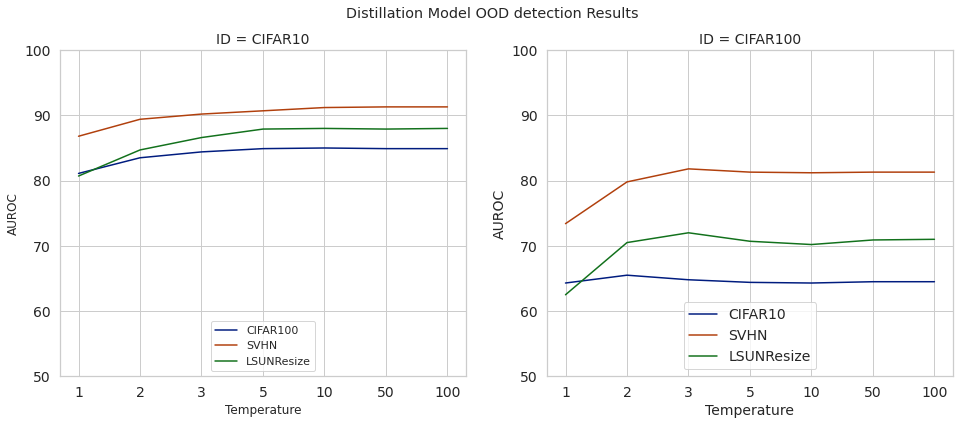

In [36]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylim([50, 100])
ax2.set_ylim([50, 100])

fig.suptitle("Distillation Model OOD detection Results")
ax1.title.set_text("ID = CIFAR10")
ax2.title.set_text("ID = CIFAR100")
ax1.title.set_fontsize(fontsize)
ax2.title.set_fontsize(fontsize)

_temp = np.unique(dscd.temperature.values)
for o in c_oods:
    ax1.plot(dscd[dscd.ood==o].sort_values(by="temperature").auroc.values, label=o)
ax1.set_xticks(np.arange(len(_temp)))
ax1.set_xticklabels(_temp, size=fontsize)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("AUROC")
ax1.legend(c_oods, loc="lower center")
set_ytickfntsize(ax1, fontsize)

_temp = np.unique(dsid.temperature.values)
for o in i_oods:
    ax2.plot(dsid[dsid.ood==o].sort_values(by="temperature").auroc.values, label=o)
ax2.set_xticks(np.arange(len(_temp)))
ax2.set_xticklabels(_temp, size=fontsize)
ax2.set_xlabel("Temperature", size=fontsize)
ax2.set_ylabel("AUROC", size=fontsize)
ax2.legend(i_oods, loc="lower center", prop={'size': fontsize})
set_ytickfntsize(ax2, fontsize)
plt.savefig(f"../cache/distilled", bbox_inches='tight')

## Graph of confidence scores

In [37]:
cif_fin_1 = gen_path(cifar_root, temp=1)
cif_fin_10 = gen_path(cifar_root, temp=10)
img_fin_1 = gen_path(img_root, temp=1)
img_fin_10 = gen_path(img_root, temp=10)

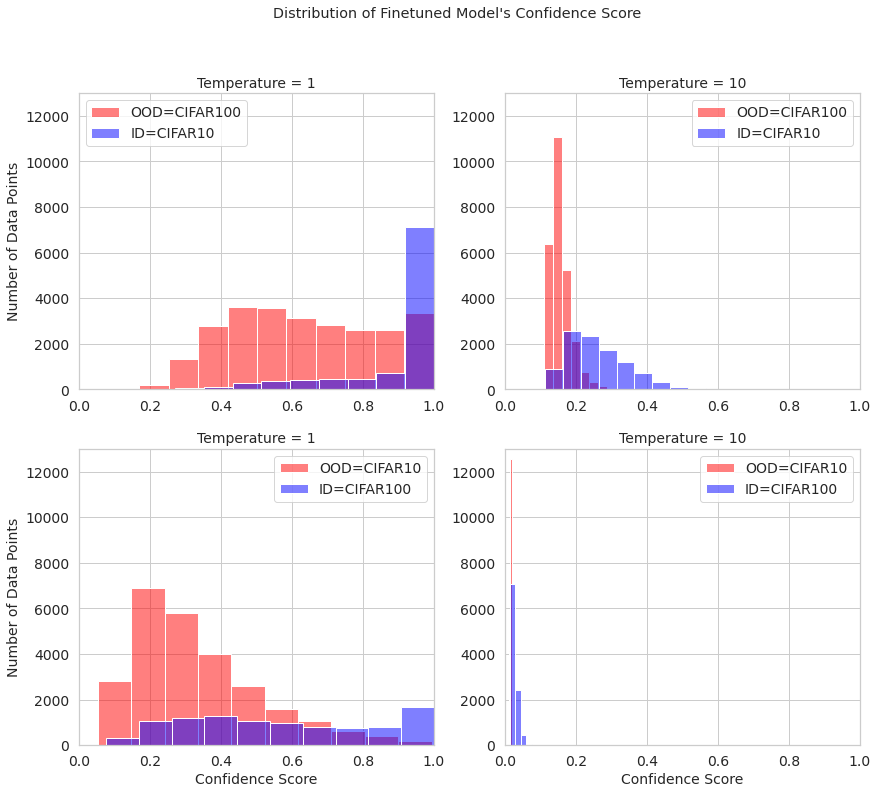

In [38]:
fig = plt.figure(figsize=(14, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


fig.suptitle("Distribution of Finetuned Model's Confidence Score")
ax1.title.set_text("Temperature = 1")
ax2.title.set_text("Temperature = 10")
ax3.title.set_text("Temperature = 1")
ax4.title.set_text("Temperature = 10")

ax1.hist(pd.read_pickle(cif_fin_1[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax1.hist(pd.read_pickle(cif_fin_1[2]), label="ID", fc=(0, 0, 1, 0.5))
#ax1.set_xlabel("Confidence Score", size=fontsize)
ax1.set_ylabel("Number of Data Points", size=fontsize)
ax1.legend(["OOD=CIFAR100", "ID=CIFAR10"], loc="upper left", prop={'size': fontsize})

ax2.hist(pd.read_pickle(cif_fin_10[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax2.hist(pd.read_pickle(cif_fin_10[2]), label="ID", fc=(0, 0, 1, 0.5))
#ax2.set_xlabel("Confidence Score", size=fontsize)
#ax2.set_ylabel("Number of Data Points", size=fontsize)
ax2.legend(["OOD=CIFAR100", "ID=CIFAR10"], loc="upper right", prop={'size': fontsize})


ax3.hist(pd.read_pickle(img_fin_1[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax3.hist(pd.read_pickle(img_fin_1[2]), label="ID", fc=(0, 0, 1, 0.5))
ax3.set_xlabel("Confidence Score", size=fontsize)
ax3.set_ylabel("Number of Data Points", size=fontsize)
ax3.legend(["OOD=CIFAR10", "ID=CIFAR100"], loc="upper right", prop={'size': fontsize})

ax4.hist(pd.read_pickle(img_fin_10[0]), label="OOD", fc=(1, 0, 0, 0.5))
ax4.hist(pd.read_pickle(img_fin_10[2]), label="ID", fc=(0, 0, 1, 0.5))
ax4.set_xlabel("Confidence Score", size=fontsize)
#ax4.set_ylabel("Number of Data Points", size=fontsize)
ax4.legend(["OOD=CIFAR10", "ID=CIFAR100"], loc="upper right", prop={'size': fontsize})

for _ax in [ax1, ax2, ax3, ax4]:
    _ax.set_ylim([0, 13000])
    _ax.set_xlim([0, 1])
    _ax.title.set_fontsize(fontsize)
    set_ytickfntsize(_ax, fontsize)
    set_xtickfntsize(_ax, fontsize)

plt.savefig(f"../cache/finetuned_confidence_scores", bbox_inches='tight')

## Cluster Evaluation

In [39]:
cifar10_k_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool"
cifar10_q_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR10_clus_768_neg_256/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_query_ckpt_199_avg_pool"
imgnet_k_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_key_ckpt_199_avg_pool"
imgnet_q_root = "/data/temiloluwa.adeoti/fourth_experiments/CIFAR100_clus_1024_neg_768/exp_1/checkpoint_199_results/ood_results/metrics_result/contrastive_enc_query_ckpt_199_avg_pool"

In [40]:
ood = "CIFAR100"
metric = "cosine"
cols_of_interest = ["cp", "hm", "cmp", "vm", "ari", "sil_cos", "db_score", "ch_score", "pca", "clusters"]
cdfk_clus = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root, 'clus_result.pickle')))
cdfk_clus = cdfk_clus[(cdfk_clus.metric==metric) & (cdfk_clus.ood==ood)][cols_of_interest]
cdfk_clus["cp"] = cdfk_clus["cp"].apply(lambda x: np.mean(x))
cdfk_clus.head(6)

,cp,hm,cmp,vm,ari,sil_cos,db_score,ch_score,pca,clusters
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.050408,4.451182,1305.186579,0,0
1,0.489226,0.414490,0.415793,0.415141,0.279385,0.138606,2.794818,2045.815007,0,10
2,0.560124,0.466905,0.361106,0.407246,0.237833,0.158475,2.396912,1493.495502,0,20
3,0.618963,0.503510,0.343588,0.408454,0.198761,0.157996,2.374160,1205.472048,0,30
4,0.633363,0.524224,0.329261,0.404475,0.168630,0.152768,2.356374,1019.527149,0,40
5,0.638903,0.531928,0.314697,0.395444,0.144961,0.147928,2.338704,890.186345,0,50


In [41]:
ood = "CIFAR10"
metric = "cosine"
idfk_clus = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, 'clus_result.pickle')))
idfk_clus = idfk_clus[(idfk_clus.metric==metric) & (idfk_clus.ood==ood)][cols_of_interest]
idfk_clus["cp"] = idfk_clus["cp"].apply(lambda x: np.mean(x))
idfk_clus.head(6)

,cp,hm,cmp,vm,ari,sil_cos,db_score,ch_score,pca,clusters
0,1.000000,1.000000,1.000000,1.000000,1.000000,-0.077148,6.299057,164.551690,0,0
1,0.264597,0.339296,0.341713,0.340500,0.096173,0.130348,2.386350,490.044258,0,100
2,0.272334,0.365302,0.337383,0.350787,0.092429,0.121825,2.446529,369.914286,0,150
3,0.284242,0.384339,0.335940,0.358514,0.085099,0.116609,2.478556,299.597894,0,200
4,0.289176,0.399170,0.334599,0.364043,0.077784,0.109542,2.523683,253.859051,0,250
5,0.290584,0.410403,0.333101,0.367733,0.071891,0.106302,2.529380,221.368724,0,300


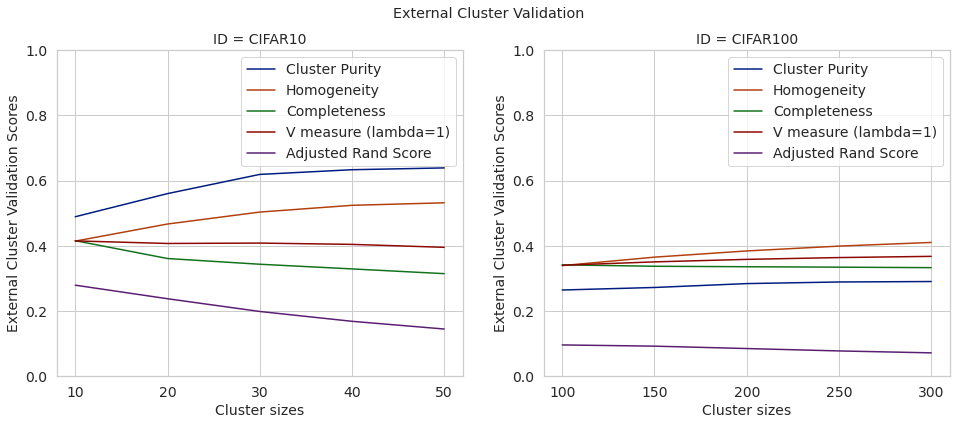

In [42]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

_c_clus = np.unique(cdfk_clus.clusters.values)[1:]
_df = cdfk_clus[(cdfk_clus.pca==0)]

fig.suptitle("External Cluster Validation")

ax1.set_ylabel('External Cluster Validation Scores', size=fontsize)
ax2.set_ylabel('External Cluster Validation Scores', size=fontsize)
ax1.set_xlabel('Cluster sizes', size=fontsize)
ax2.set_xlabel('Cluster sizes', size=fontsize)


ax1.title.set_text("ID = CIFAR10")
ax1.plot(_df.cp.values[1:], label="Cluster Purity")
ax1.plot(_df.hm.values[1:], label="Homogeneity")
ax1.plot(_df.cmp.values[1:], label="Completeness")
ax1.plot(_df.vm.values[1:], label="V measure (lambda=1)")
ax1.plot(_df.ari.values[1:], label="Adjusted Rand Score")
ax1.set_xticks(np.arange(len(_c_clus)))
a = ax1.set_xticklabels(_c_clus, size=fontsize)
ax1.legend(prop={'size': fontsize})
set_ytickfntsize(ax1, fontsize)
ax1.title.set_fontsize(fontsize)



ax2.title.set_text("ID = CIFAR100")
_i_clus = np.unique(idfk_clus.clusters.values)[1:]
_df = idfk_clus[(idfk_clus.pca==0)]
ax2.plot(_df.cp.values[1:], label="Cluster Purity")
ax2.plot(_df.hm.values[1:], label="Homogeneity")
ax2.plot(_df.cmp.values[1:], label="Completeness")
ax2.plot(_df.vm.values[1:], label="V measure (lambda=1)")
ax2.plot(_df.ari.values[1:], label="Adjusted Rand Score")
ax2.set_xticks(np.arange(len(_i_clus)))
a = ax2.set_xticklabels(_i_clus, size=fontsize)
ax2.legend(prop={'size': fontsize})
set_ytickfntsize(ax2, fontsize)
ax2.title.set_fontsize(fontsize)

plt.savefig(f"../cache/external_cluster", bbox_inches='tight')

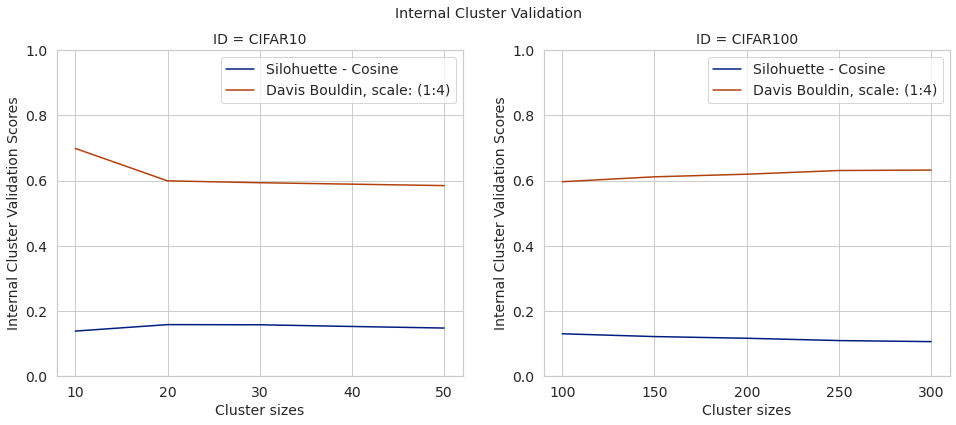

In [47]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])

_c_clus = np.unique(cdfk_clus.clusters.values)[1:]
_df = cdfk_clus[(cdfk_clus.pca==0)]

fig.suptitle("Internal Cluster Validation")

ax1.set_ylabel('Internal Cluster Validation Scores', size=fontsize)
ax2.set_ylabel('Internal Cluster Validation Scores', size=fontsize)
ax1.set_xlabel('Cluster sizes', size=fontsize)
ax2.set_xlabel('Cluster sizes', size=fontsize)

_scale_factor = 0.25
ax1.title.set_text("ID = CIFAR10")
ax1.plot(_df.sil_cos.values[1:], label="Silohuette - Cosine")
ax1.plot(_df.db_score.values[1:] * _scale_factor, label="Davis Bouldin, scale: (1:4)")
ax1.set_xticks(np.arange(len(_c_clus)))
a = ax1.set_xticklabels(_c_clus, size=fontsize)
ax1.legend(prop={'size': fontsize})
set_ytickfntsize(ax1, fontsize)
ax1.title.set_fontsize(fontsize)


ax2.title.set_text("ID = CIFAR100")
_i_clus = np.unique(idfk_clus.clusters.values)[1:]
_df = idfk_clus[(idfk_clus.pca==0)]
ax2.plot(_df.sil_cos.values[1:], label="Silohuette - Cosine")
ax2.plot(_df.db_score.values[1:] *_scale_factor, label="Davis Bouldin, scale: (1:4)")
ax2.set_xticks(np.arange(len(_i_clus)))
a = ax2.set_xticklabels(_i_clus, size=fontsize)
ax2.legend(prop={'size': fontsize})
set_ytickfntsize(ax2, fontsize)
ax2.title.set_fontsize(fontsize)

plt.savefig(f"../cache/internal_cluster", bbox_inches='tight')

In [48]:
cdfk_clus.columns

Index(['cp', 'hm', 'cmp', 'vm', 'ari', 'sil_cos', 'db_score', 'ch_score',
       'pca', 'clusters'],
      dtype='object')

## Check any result

In [ ]:
ood = "CIFAR100"
met = "cosine"
cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root , "results.pickle")))[colms]
cdfk = cdfk[(cdfk.metric ==met)]
cdfk = cdfk[(cdfk.ood == ood)]
cdfk.sort_values(by=['sklearn_auroc'], ascending=False)

In [ ]:
ood = "LSUNResize"
met = "mahalanobis"
idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
idfk = idfk[(idfk.ood == ood) & (idfk.metric ==met)]
idfk.sort_values(by=['sklearn_auroc'], ascending=False)

## Appendix

In [ ]:
idfk = pd.DataFrame(pd.read_pickle(os.path.join(imgnet_k_root, "results.pickle")))[colms]
cdfk = pd.DataFrame(pd.read_pickle(os.path.join(cifar10_k_root , "results.pickle")))[colms]
iid = "CIFAR10"
if iid == "CIFAR100":
    cdfk = idfk
met = "cosine"
cols = ["metric", "clusters", "ood", "pca", "sklearn_auroc"]
cdfk = cdfk[(cdfk.metric ==met) & (cdfk.global_mal_cov==False)][cols]
u_clus = np.unique(cdfk.clusters)
u_pca = np.unique(cdfk.pca)
num_clus = len(u_clus)
num_pca = len(u_pca)

fig = plt.figure(figsize=(20, 20))

axes = []
for i in range(num_clus * num_pca):
    axes.append(fig.add_subplot(num_clus, num_pca, i+1))

for i in range(num_clus):
    for j in range(num_pca):
        _df = cdfk[(cdfk.clusters==u_clus[i]) & (cdfk.pca==u_pca[j])]
        _df = _df[['ood', 'sklearn_auroc']]
        _df = _df.rename(columns={'ood':'OOD data', 'sklearn_auroc': 'AUROC'})
        _i = i*num_pca + j
        sns.barplot(x='OOD data', y='AUROC', data=_df, ax=axes[_i])
        axes[_i].title.set_text(f"Cluster={u_clus[i]}, PCA={u_pca[j]}")
        axes[_i].set_ylim([0, 100])

fig.suptitle(f"ID={iid}, Metric={met.capitalize()}")
fig.tight_layout()
plt.savefig(f"../cache/{iid}_ood_charts_{met}")

In [ ]:
cdfk 

## Prototypes

In [ ]:
cif10_p = pd.DataFrame(pd.read_pickle("../cache/CIFAR10_prototype_ood_result.pickle"))
cif10_p = cif10_p[['ood', 'metric', 'pca', 'sklearn_auroc', 'global_mal_cov']]
cif10_p = cif10_p[(cif10_p.global_mal_cov)]
cif10_p = cif10_p.rename(columns={'ood':'OOD data', 'sklearn_auroc': 'AUROC'})
cif10_p

In [ ]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text("ID=CIFAR10, Metric=Mahalanobis")
ax1.set_ylim([0, 100])

ax2.title.set_text("ID=CIFAR10, Metric=Cosine")
ax2.set_ylim([0, 100])

_df = cif10_p[(cif10_p.metric=="mahalanobis")]
_df = _df[['OOD data', 'AUROC']]
sns.barplot(x='OOD data', y='AUROC', data=_df, ax=ax1)

_df = cif10_p[(cif10_p.metric=="cosine")]
_df = _df[['OOD data', 'AUROC']]
sns.barplot(x='OOD data', y='AUROC', data=_df, ax=ax2)

fig.suptitle(f"OOD detection using 768 PCL prototypes with CIFAR10 as ID")
plt.savefig(f"../cache/CIFAR10_prototypes_ood_charts")

In [ ]:
cif10_p = pd.DataFrame(pd.read_pickle("../cache/CIFAR100_prototype_ood_result.pickle"))
cif10_p = cif10_p[['ood', 'metric', 'pca', 'sklearn_auroc', 'global_mal_cov']]
cif10_p = cif10_p[(cif10_p.global_mal_cov)]
cif10_p = cif10_p.rename(columns={'ood':'OOD data', 'sklearn_auroc': 'AUROC'})
cif10_p

In [ ]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text("ID=CIFAR100, Metric=Mahalanobis")
ax1.set_ylim([0, 100])

ax2.title.set_text("ID=CIFAR100, Metric=Cosine")
ax2.set_ylim([0, 100])

_df = cif10_p[(cif10_p.metric=="mahalanobis")]
_df = _df[['OOD data', 'AUROC']]
sns.barplot(x='OOD data', y='AUROC', data=_df, ax=ax1)

_df = cif10_p[(cif10_p.metric=="cosine")]
_df = _df[['OOD data', 'AUROC']]
sns.barplot(x='OOD data', y='AUROC', data=_df, ax=ax2)

fig.suptitle(f"OOD detection using 1024 PCL prototypes with CIFAR100 as ID")
plt.savefig(f"../cache/CIFAR100_prototypes_ood_charts")